In [167]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [168]:
diabetes = pd.read_csv('diabetes_data.csv')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [169]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

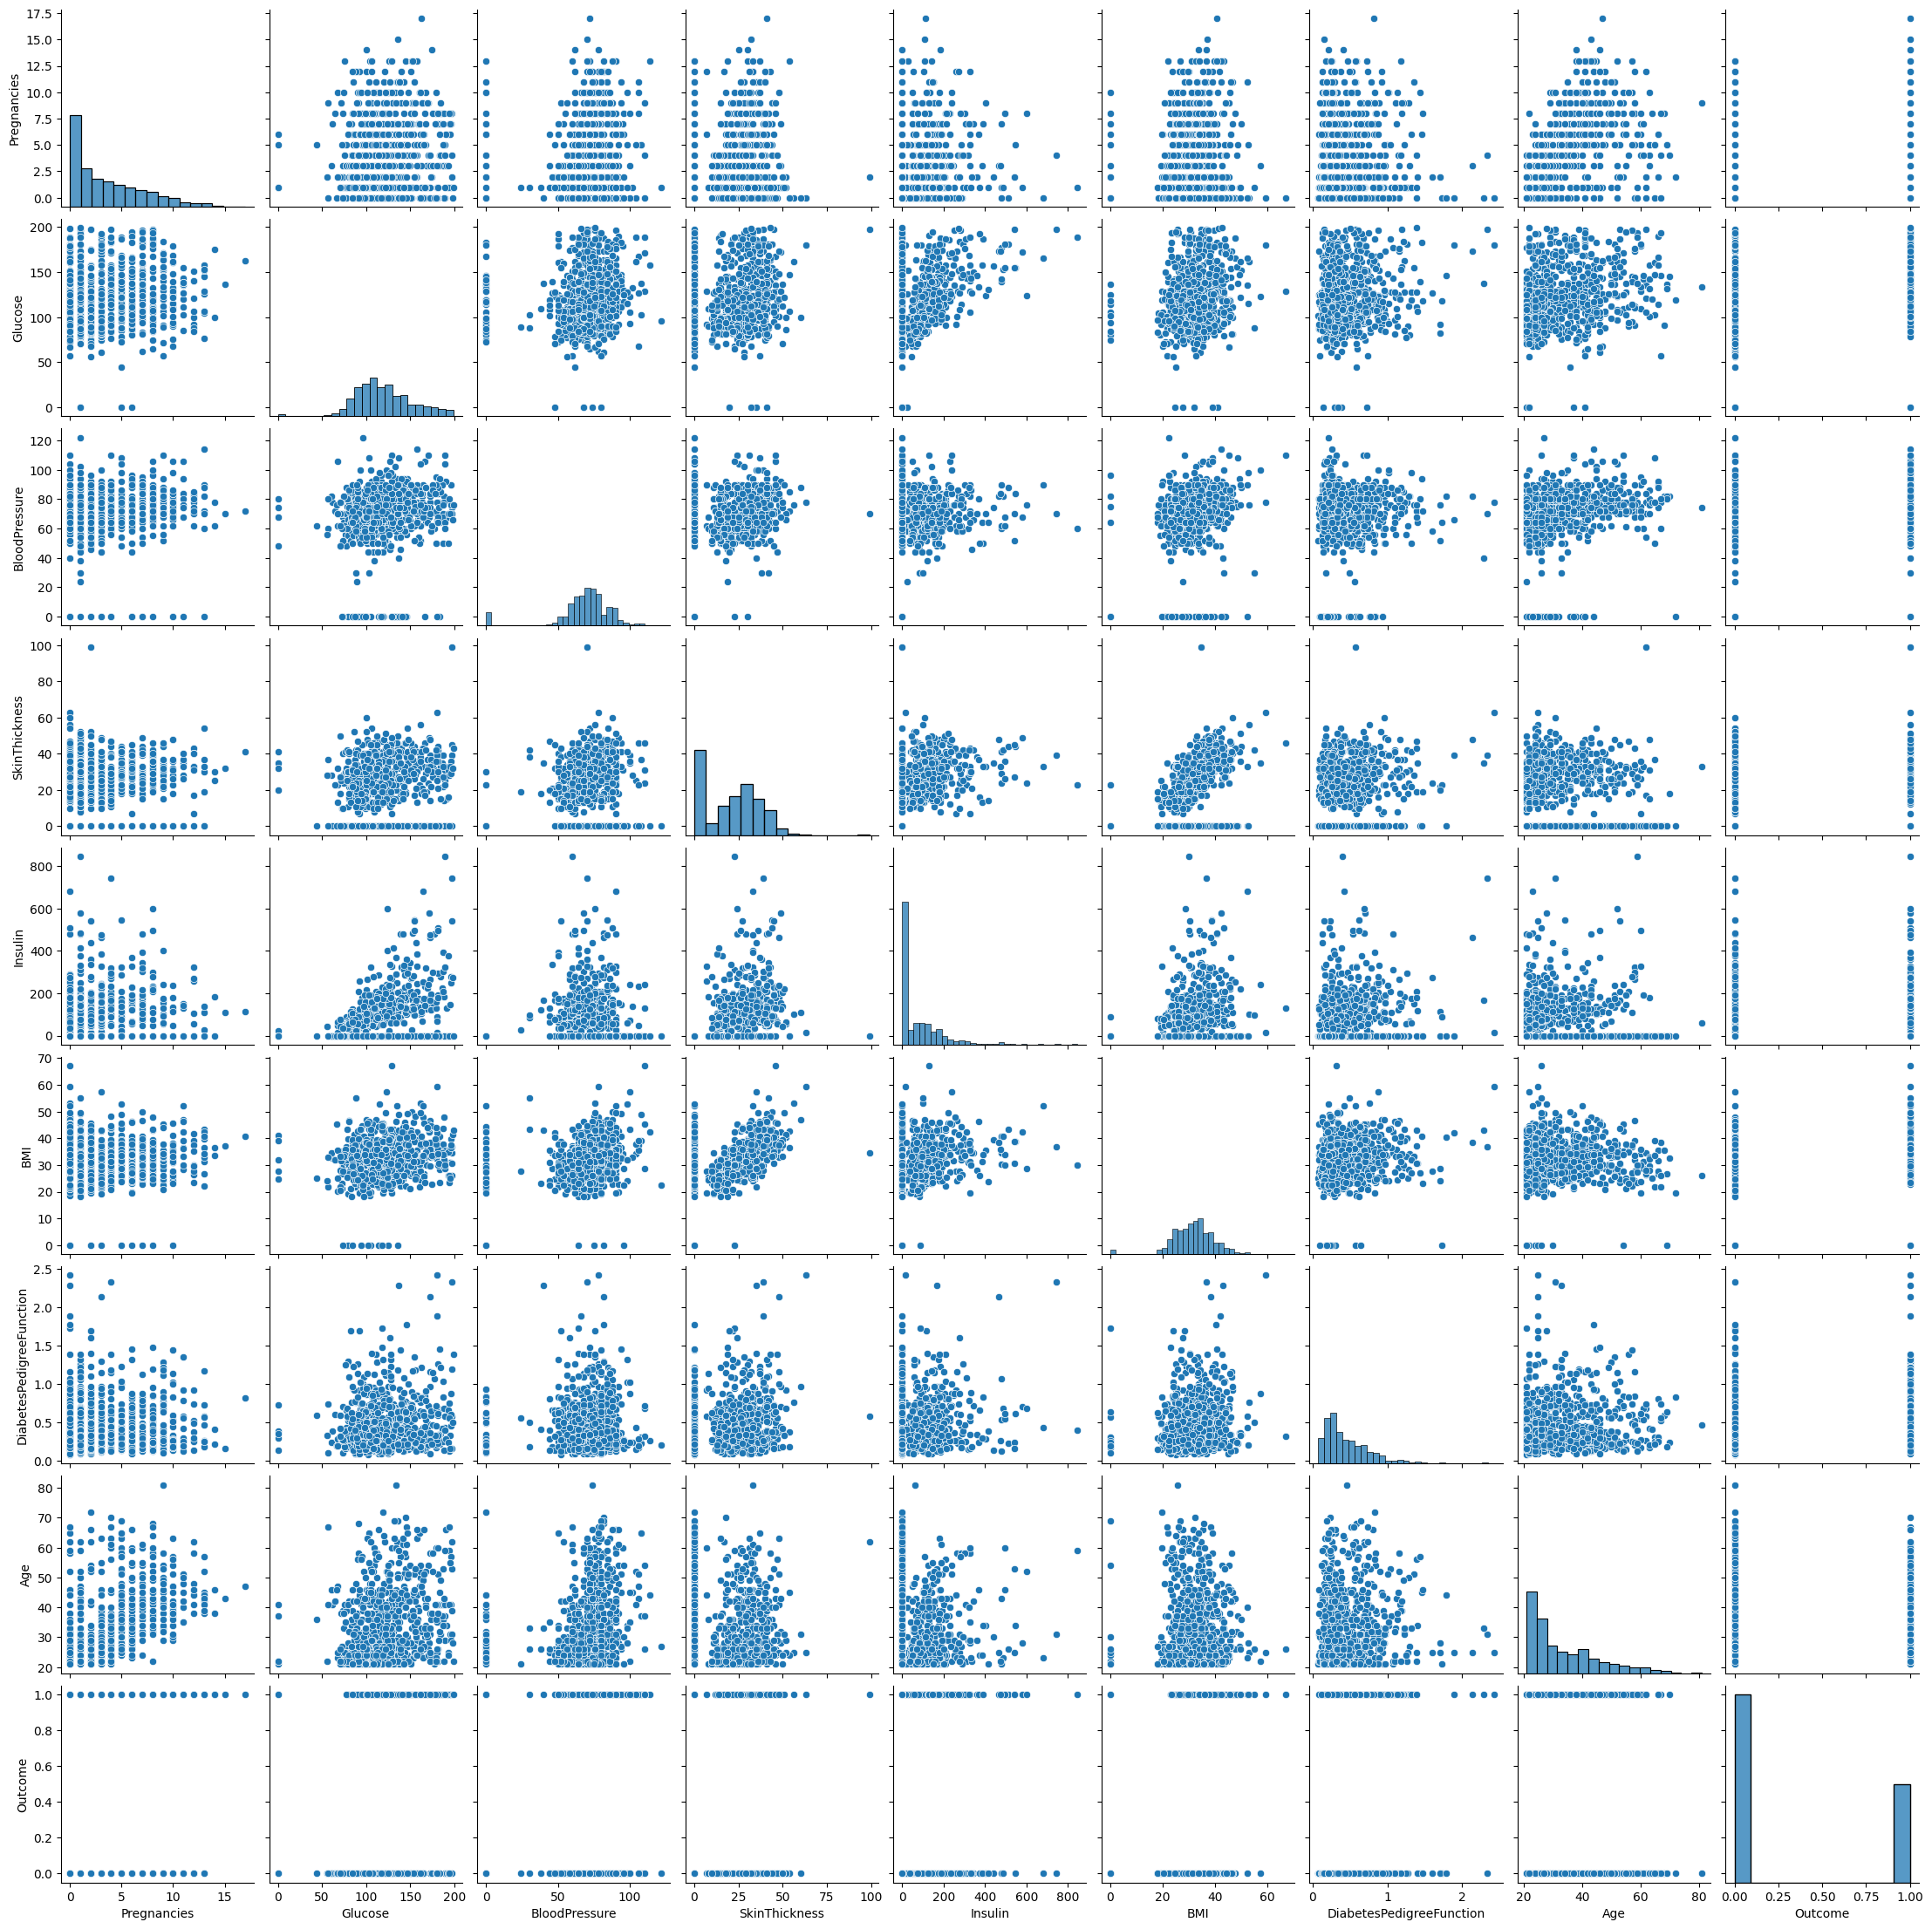

In [170]:
sns.pairplot(diabetes)

In [171]:
# Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. 
# Сколько записей осталось в данных?
diabetes.drop_duplicates(inplace=True)
diabetes.shape

(768, 10)

In [172]:
# Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: 
# удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена признаков, которые вы нашли 
# (без кавычек).

#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [173]:
diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabetes.shape[1]}')

Результирующее число признаков: 9


In [174]:
# Попробуйте найти пропуски в данных с помощью метода isnull().
# Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. 
# Его вы можете взять из библиотеки numpy: np.nan.
# Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

column_stack = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in column_stack:
    diabetes[col] = diabetes[col].replace(0, np.nan)

round(diabetes['Insulin'].isnull().value_counts(normalize=True), 2)

Insulin
False    0.51
True     0.49
Name: proportion, dtype: float64

In [175]:
# Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных 
# (с учетом удаленных неинформативных признаков в задании 8.2)?
for col in diabetes.columns:
    if diabetes[col].isnull().sum() / len(diabetes[col]) > 0.3:
        diabetes = diabetes.drop(col, axis=1)

print(diabetes.shape)

(768, 8)


In [176]:
# Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?
null_counts = diabetes.isnull().sum(axis=1)
diabetes = diabetes[null_counts <= 2]
diabetes.shape

(761, 8)

In [177]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [178]:
# В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

values = {
    'Glucose': diabetes['Glucose'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'SkinThickness': diabetes['SkinThickness'].median(),
    'BMI': diabetes['BMI'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
diabetes = diabetes.fillna(values)
#выводим результирующую долю пропусков
round(diabetes['SkinThickness'].mean(), 1)

np.float64(29.1)

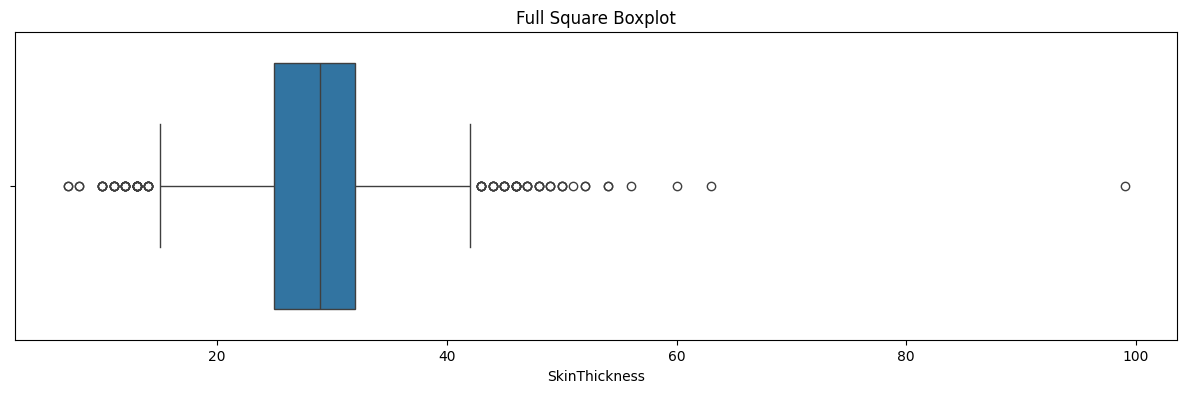

In [179]:
# Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
fig, axes = plt.subplots(figsize=(15, 4))
boxplot = sns.boxplot(data=diabetes, x='SkinThickness');
boxplot.set_title('Full Square Boxplot');

In [ ]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers, cleaned = outliers_iqr(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

In [ ]:
# Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [186]:
outliers, cleaned = outliers_z_score(diabetes, 'SkinThickness', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


In [187]:
# На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, 
# и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с 
# помощью классического метода межквартильного размаха.

# Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). 
# Какова разница между двумя этими числами (вычтите из первого второе)?

outliers, cleaned = outliers_iqr(diabetes, 'DiabetesPedigreeFunction')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 29
Результирующее число записей: 732


In [189]:
outliers, cleaned = outliers_z_score(diabetes, 'DiabetesPedigreeFunction', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 11
Результирующее число записей: 750


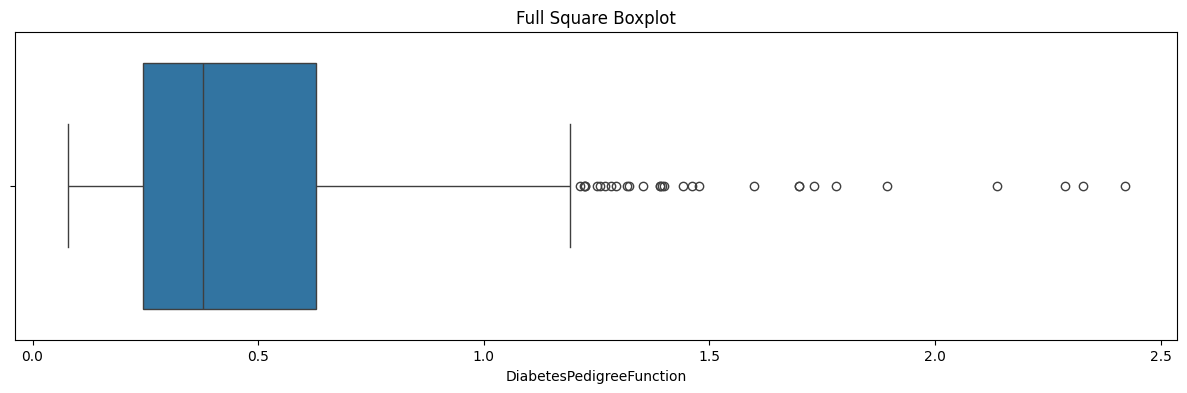

In [188]:
fig, axes = plt.subplots(figsize=(15, 4))
boxplot = sns.boxplot(data=diabetes, x='DiabetesPedigreeFunction');
boxplot.set_title('Full Square Boxplot');

In [191]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

29
